##**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle


In [ ]:
pip install statsmodels --upgrade

In [ ]:
pip install scikit-learn --upgrade

##**Data Fetching from Excel file**

In [3]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


## **Min - Max Scaler**

In [5]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

## **Checking for Stationarity of Time Series**



**Plotting Graphs of all values**

[150. 150. 150. ...  61.  61.  61.]


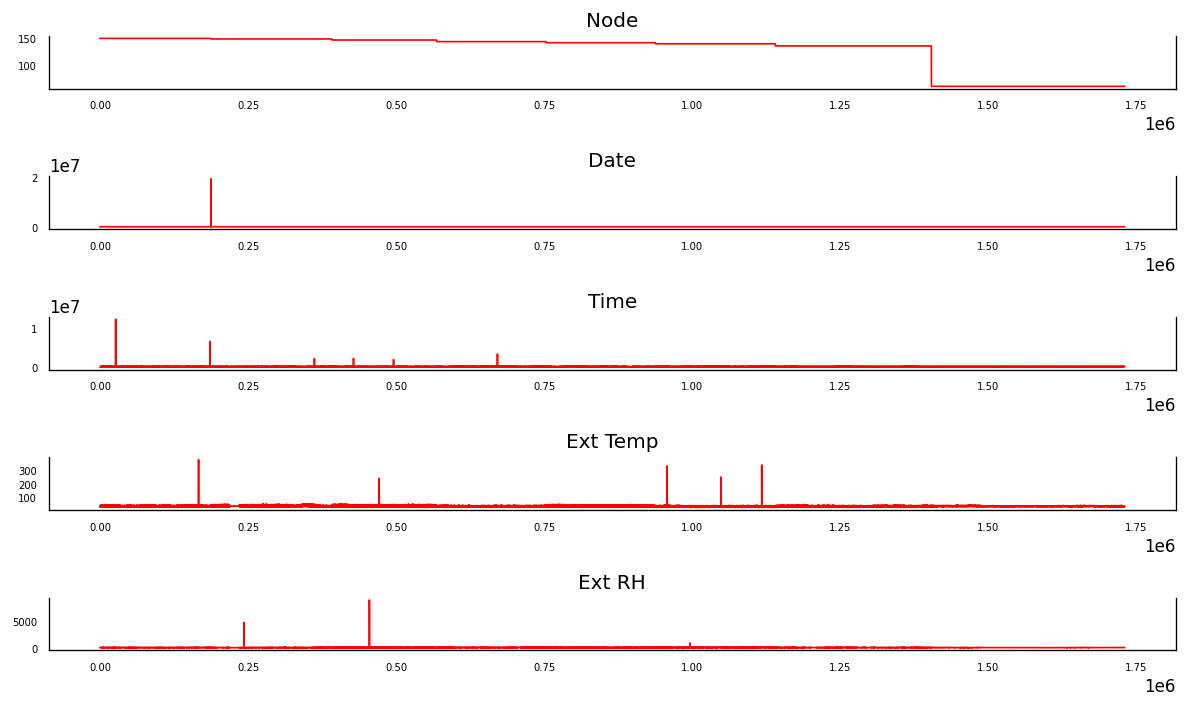

In [4]:
data=A1[:,0]
name=["Node","Date","Time","Ext Temp","Ext RH"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=A1[:,i]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


[28. 28. 31. ... 76. 75. 76.]


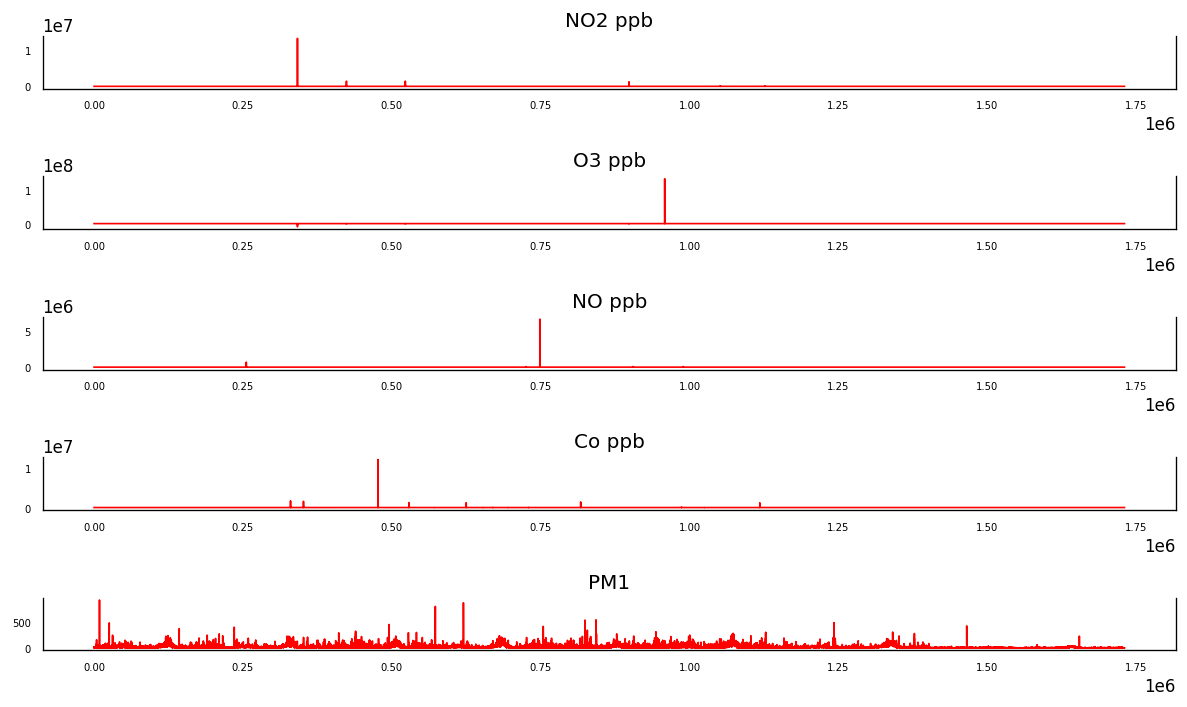

In [5]:

data=U1[:,0]
name=["NO2 ppb","O3 ppb","NO ppb","Co ppb","PM1","PM 2.5","PM 10"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=U1[:,i]

  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


**Augmented Dickey–Fuller test for checking stationarity**

if p value is less then 0.50 it means it is in stationary 

In [ ]:
# print(A1[0:,2])
from statsmodels.tsa.stattools import adfuller
for i in range(0,7):
  ad_fuller_result_1=adfuller(U1[:,i])
  print('realgdp')
  print(f'ADF Statistic: {ad_fuller_result_1[0]}')
  if ad_fuller_result_1[1]<0.05:
    print('Stationary Series')
  else:
    print('Non-Stationary Series')
  print(f'p-value: {ad_fuller_result_1[1]}')

  print('\n----------------------------\n')



##**3.Vector Auto Regression Model (VAR)**

In [ ]:
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from statsmodels.tsa.statespace.varmax import VARMAX

model3=VARMAX(exog=x_train,endog=y_train,order=(1,0))

#training the model
model_fit3=model3.fit(disp=False)
print("Model training is Done!!")

filename3 = 'Models_File/var.sav'
pickle.dump(model_fit3, open(filename3, 'wb'))

Model training is Done!!


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

model_fit3=pickle.load(open('var.sav', 'rb'))
model_fit3.aic

EOFError: Ran out of input

In [1]:
from sklearn import metrics
from matplotlib import style

# Forecasting
y_test_pred3=model_fit3.forecast(exog=x_test,steps=len(x_test))
y_train_pred3=model_fit3.forecast(exog=x_train,steps=len(x_train))

#finding out the r2 score

r2_test3=r2_score(y_test,y_test_pred3)
r2_train3=r2_score(y_train,y_train_pred3)

print('r2 score on train data '+str(r2_train3))
print('r2 score on test data '+ str(r2_test3))

# Errors 
var_mae=metrics.mean_absolute_error(y_test, y_test_pred3)
var_mse=metrics.mean_squared_error(y_test, y_test_pred3)
var_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3))
print('Mean Absolute Error:',var_mae)
print('Mean Squared Error:',var_mse )
print('Root Mean Squared Error:',var_rmse)
var_aic=model_fit3.aic
print("AIC Value for VAR Model:",var_aic)
var_bic=model_fit3.bic
print("BIC Value for VAR Model:",var_bic)

NameError: name 'model_fit3' is not defined

Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84454191 0.47391011 0.36876555 ... 0.01488849 0.00953531 0.01022517]
 [0.83526275 0.47530266 0.38637578 ... 0.01253591 0.00766406 0.00871153]
 [0.85871225 0.46898695 0.35695884 ... 0.02366829 0.01515428 0.01590251]
 ...
 [0.83902116 0.47654048 0.36735623 ... 0.00975819 0.00626788 0.00696239]
 [0.86460062 0.4650226  0.35289805 ... 0.02519868 0.01586015 0.01685888]
 [0.83673343 0.47055984 0.34933673 ... 0.00540468 0.00323    0.00353922]]


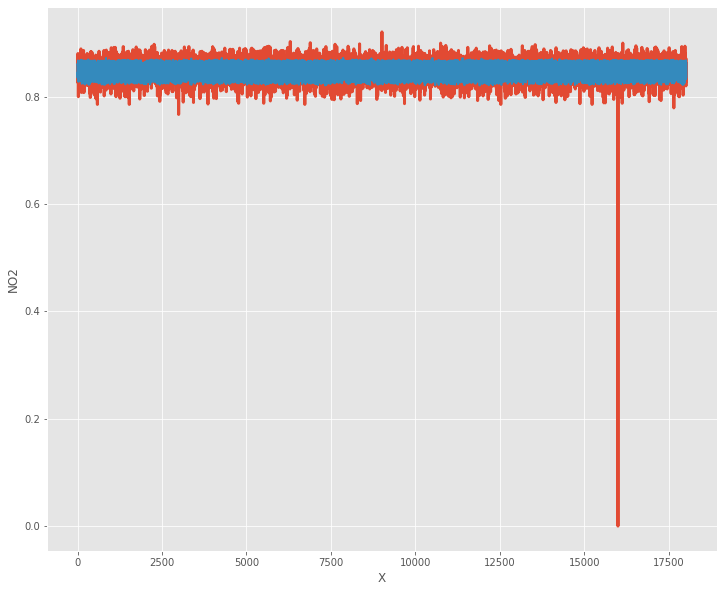

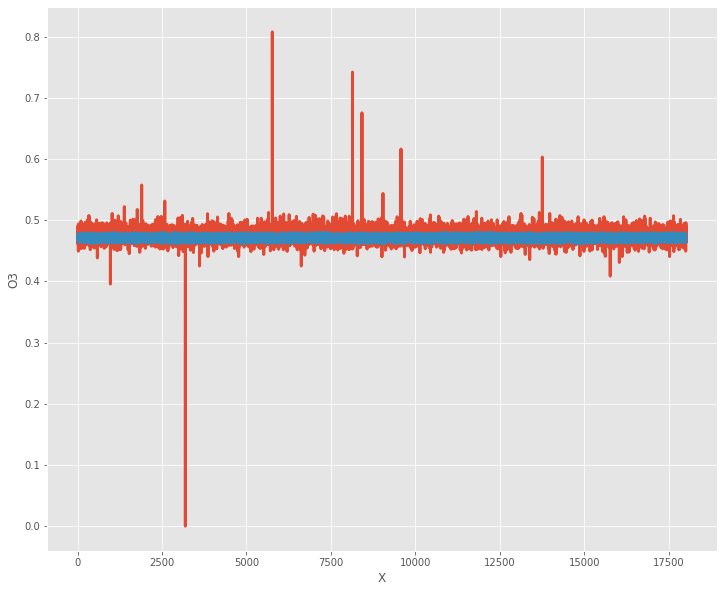

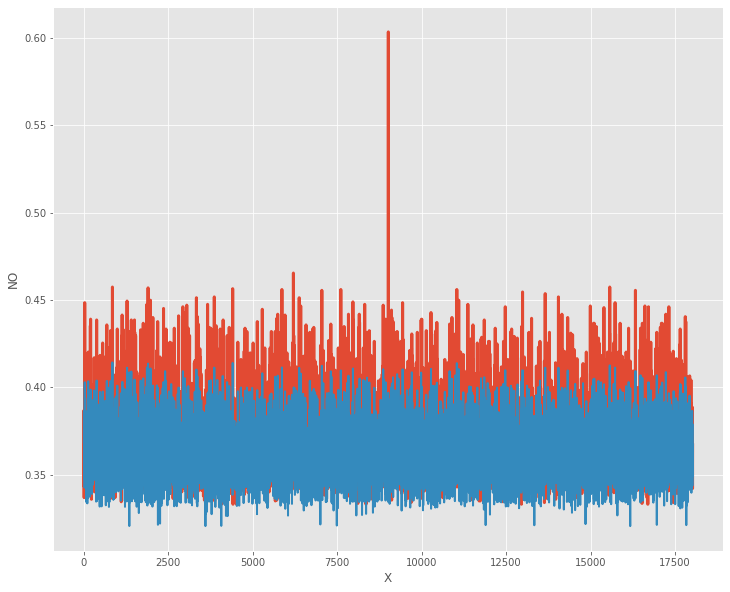

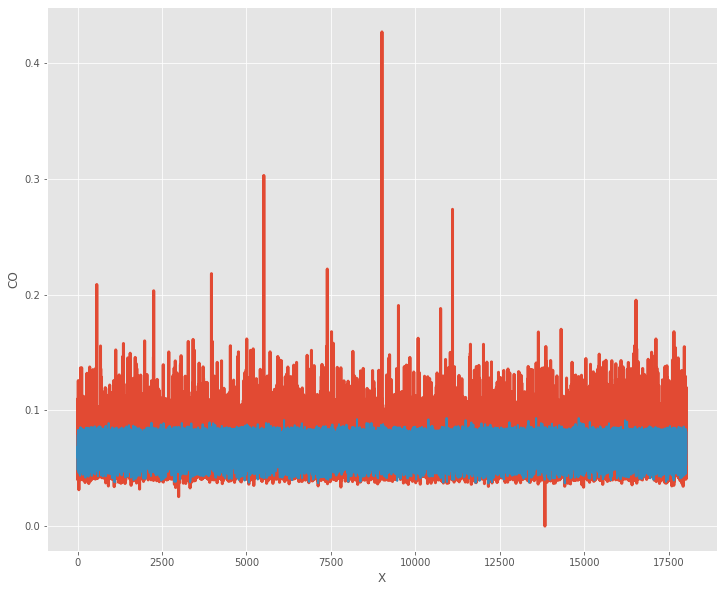

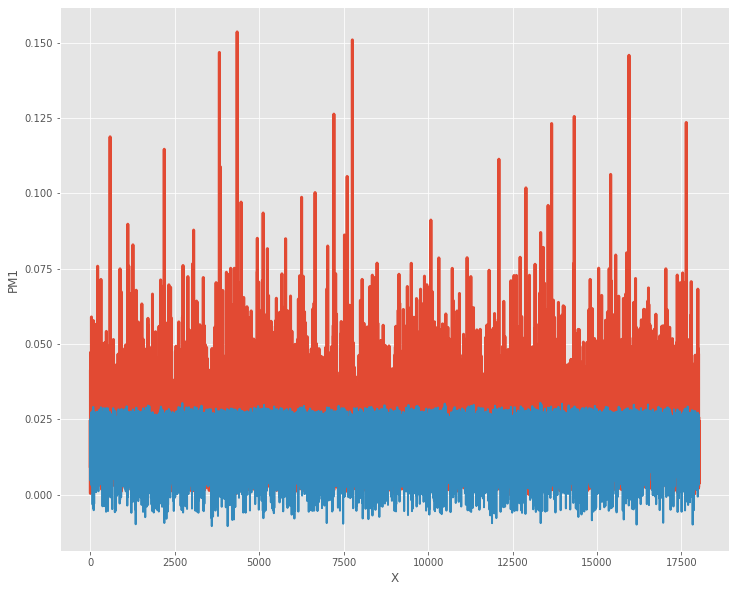

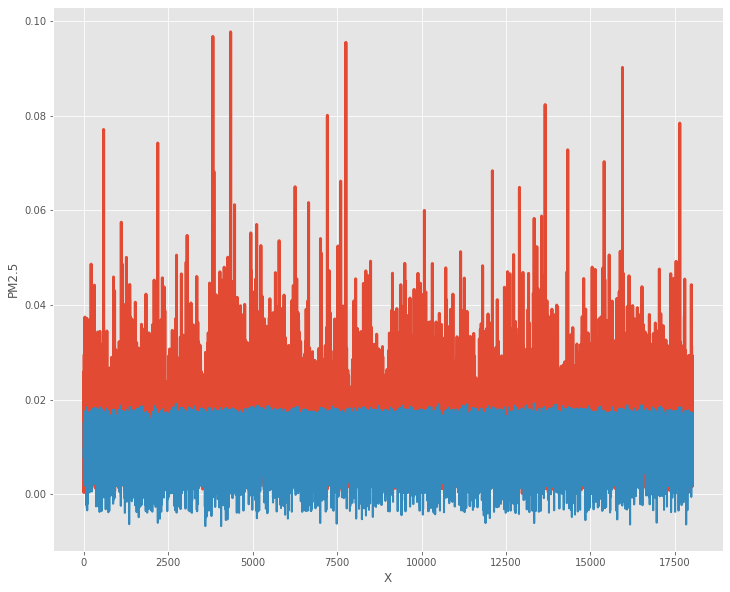

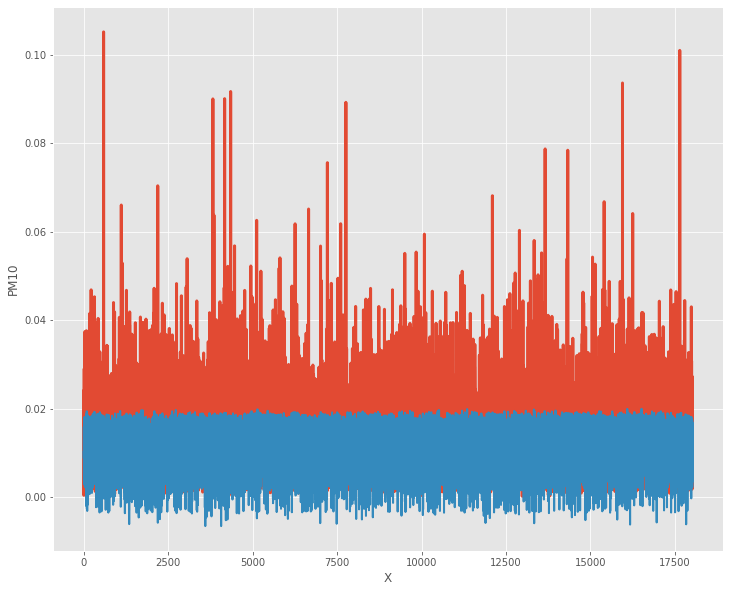

In [15]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred3)

style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred3[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()


##**4.Vector Moving Average (VMA Model)**

In [16]:
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from statsmodels.tsa.statespace.varmax import VARMAX

model4=VARMAX(exog=x_train,endog=y_train,order=(0,1))

#training the model
model_fit4=model4.fit(disp=False)
print("Model training is Done!!")

filename4 = 'vma.sav'
pickle.dump(model_fit4, open(filename4, 'wb'))

Model training is Done!!


In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

# Forecasting
y_test_pred4=model_fit4.forecast(exog=x_test,steps=len(x_test))
y_train_pred4=model_fit4.forecast(exog=x_train,steps=len(x_train))

#finding out the r2 score
r2_test4=r2_score(y_test,y_test_pred4)
r2_train4=r2_score(y_train,y_train_pred4)
print('r2 score on train data '+ str(r2_train4))
print('r2 score on test data '+ str(r2_test4))

# Errors
vma_mae=metrics.mean_absolute_error(y_test, y_test_pred4)
vma_mse=metrics.mean_squared_error(y_test, y_test_pred4)
vma_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4))
print('Mean Absolute Error:',vma_mae)
print('Mean Squared Error:',vma_mse )
print('Root Mean Squared Error:',vma_rmse)

# AIC and BIC
vma_aic=model_fit4.aic
print("AIC Value for VMA Model:",vma_aic)
vma_bic=model_fit4.bic
print("BIC Value for VMA Model:",vma_bic)


r2 score on train data 0.3339029193613109
r2 score on test data 0.36034097852264296
Mean Absolute Error: 0.007300713574989763
Mean Squared Error: 0.00012161140493576916
Root Mean Squared Error: 0.011027756115174526
AIC Value for VMA Model: -3623029.066632705
BIC Value for VMA Model: -3621935.986686591


In [ ]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred4)

from matplotlib import style
style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred4[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

##**5.Vector Auto Regressive Moving Average Model (VARMAX)**

In [18]:
from statsmodels.tsa.statespace.varmax import VARMAX
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

model5=VARMAX(exog=x_train,endog=y_train,order=(1,1))

#training the model
model_fit5=model5.fit(disp=False)
print("Model training is Done!!")

# Dumping Model into a file
filename5 = 'varmax.sav'
pickle.dump(model_fit5, open(filename5, 'wb'))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Model training is Done!!


In [20]:
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

#finding out the r2 score
y_test_pred5=model_fit5.forecast(exog=x_test,steps=len(x_test))
y_train_pred5=model_fit5.forecast(exog=x_train,steps=len(x_train))


r2_test5=r2_score(y_test,y_test_pred5)
r2_train5=r2_score(y_train,y_train_pred5)


print('r2 score on train data '+ str(r2_train5))
print('r2 score on test data '+ str(r2_test5))

varmax_mae=metrics.mean_absolute_error(y_test, y_test_pred5)
varmax_mse=metrics.mean_squared_error(y_test, y_test_pred5)
varmax_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5))
print('Mean Absolute Error:',varmax_mae)
print('Mean Squared Error:',varmax_mse )
print('Root Mean Squared Error:',varmax_rmse)

varmax_aic=model_fit5.aic
print("AIC Value for VARMAX Model:",varmax_aic)
varmax_bic=model_fit5.bic
print("BIC Value for VARMAX Model:",varmax_bic)

r2 score on train data 0.33375415451011453
r2 score on test data 0.36008704455714285
Mean Absolute Error: 0.007302540667162326
Mean Squared Error: 0.00012164231712440681
Root Mean Squared Error: 0.011029157589063945
AIC Value for VARMAX Model: -3622904.383916931
BIC Value for VARMAX Model: -3621361.2122283005


Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84454354 0.47390895 0.36876583 ... 0.01489024 0.00953651 0.01022582]
 [0.83526278 0.47530264 0.38637577 ... 0.01253591 0.00766405 0.00871152]
 [0.85871226 0.46898694 0.35695885 ... 0.02366831 0.01515429 0.01590252]
 ...
 [0.83902116 0.47654047 0.36735624 ... 0.00975821 0.00626789 0.0069624 ]
 [0.86460063 0.46502259 0.35289805 ... 0.0251987  0.01586016 0.01685889]
 [0.83673343 0.47055983 0.34933674 ... 0.0054047  0.00323001 0.00353923]]


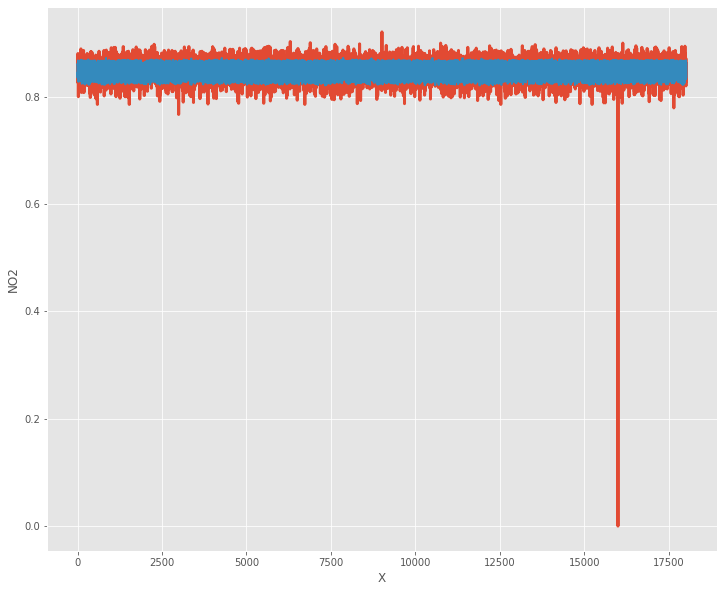

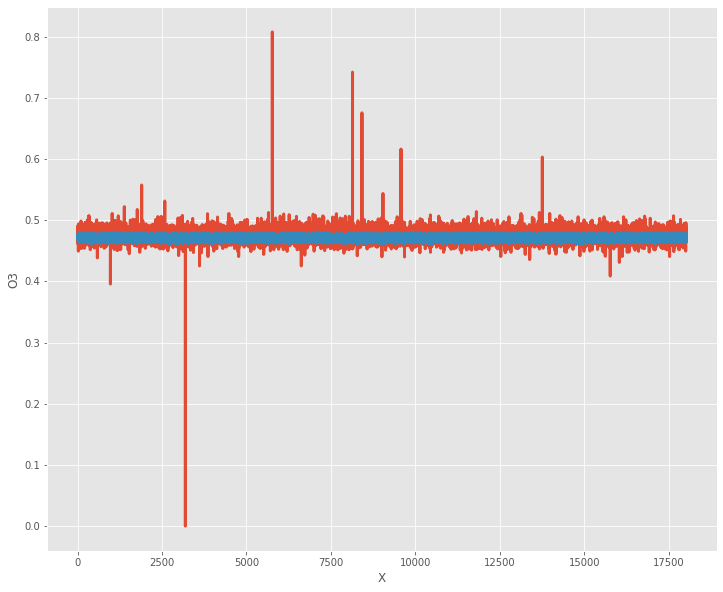

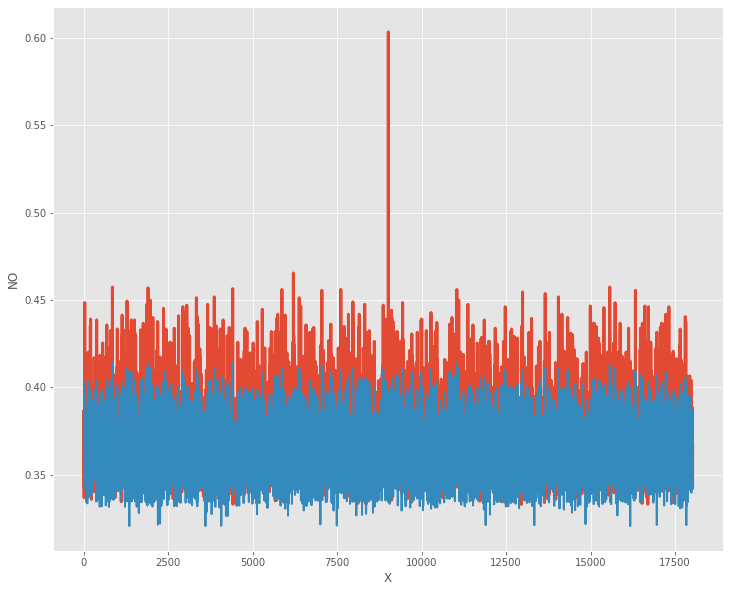

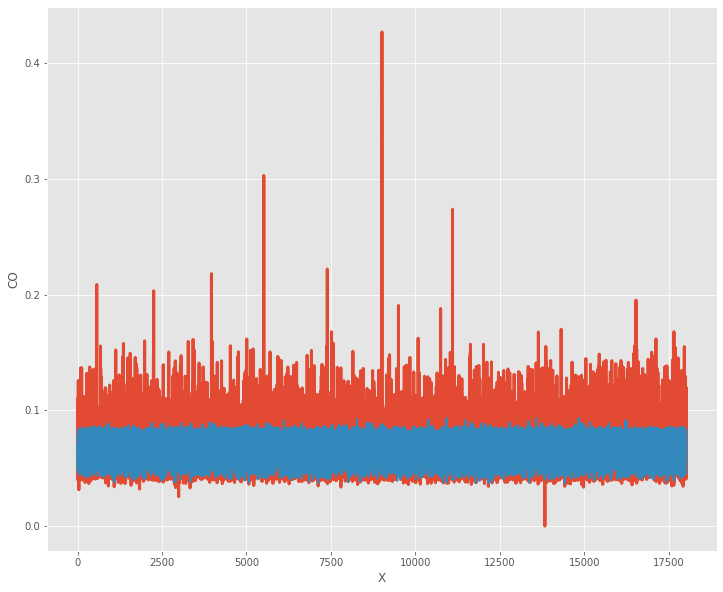

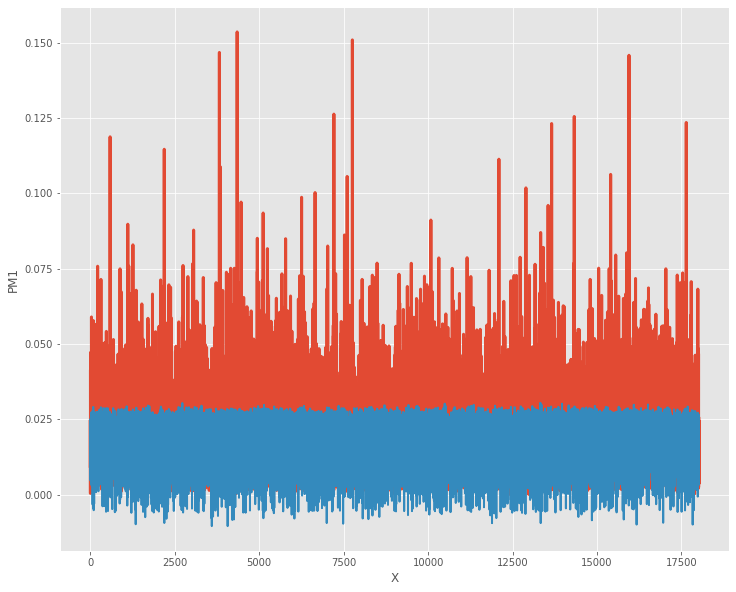

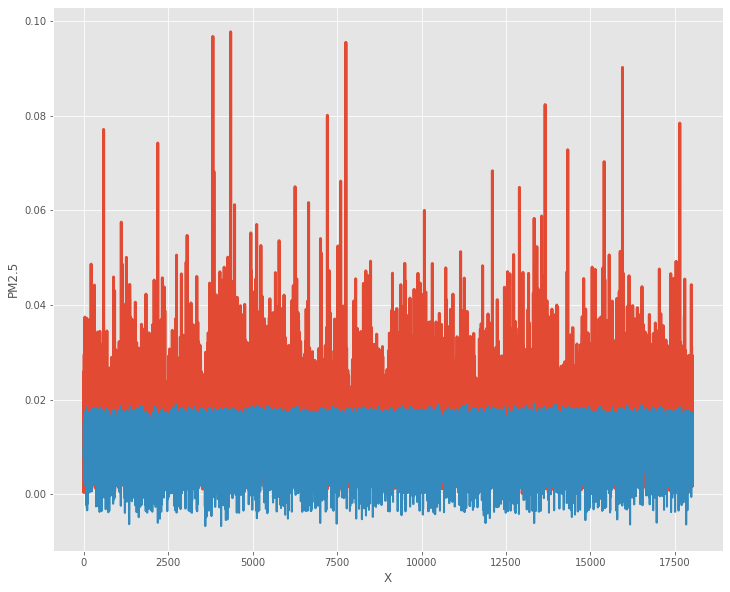

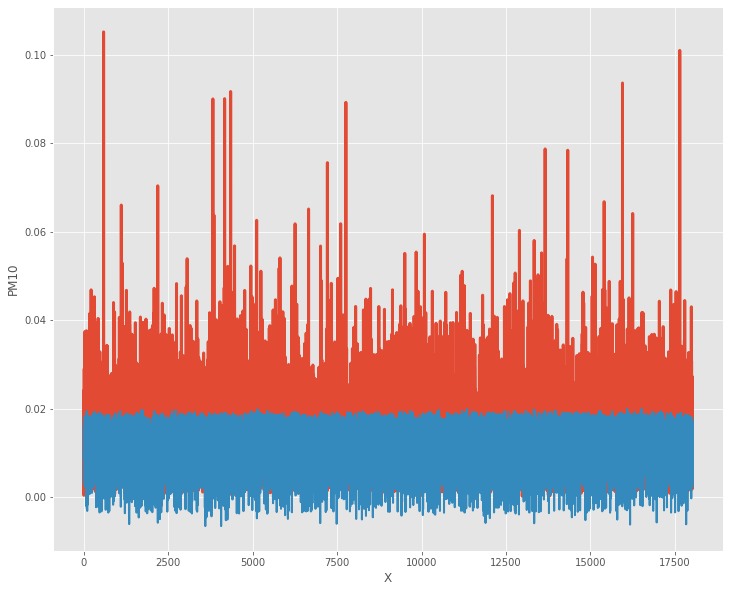

In [21]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred5)

from matplotlib import style

style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred5[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

##**6.K Nearest Neighbour Algorithm**

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)


model6 =MultiOutputRegressor(KNeighborsRegressor(n_neighbors=4))
model_fit6=model6.fit(x_train, y_train)

print('Model Training done!!')

# Dumping Model into a file

filename6 = 'knn.sav'
pickle.dump(model_fit6, open(filename6, 'wb'))

Model Training done!!


In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

y_test_pred6=model_fit6.predict(x_test)
y_train_pred6=model_fit6.predict(x_train)

#finding out the r2 score
r2_test6=r2_score(y_test,y_test_pred6)
r2_train6=r2_score(y_train,y_train_pred6)

print('r2 score on train data '+ str(r2_train6))
print('r2 score on test data '+ str(r2_test6))

knn_mae=metrics.mean_absolute_error(y_test, y_test_pred6)
knn_mse=metrics.mean_squared_error(y_test, y_test_pred6)
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6))
print('Mean Absolute Error:',knn_mae)
print('Mean Squared Error:',knn_mse )
print('Root Mean Squared Error:',knn_rmse)

r2 score on train data 0.8710465258994434
r2 score on test data 0.8029100802530473
Mean Absolute Error: 0.0018971251093713416
Mean Squared Error: 3.451732882457915e-05
Root Mean Squared Error: 0.005875145004557688


Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.83608914 0.46953095 0.36188235 ... 0.01019921 0.00646751 0.00684041]
 [0.84094177 0.4698193  0.38329412 ... 0.01079727 0.00670715 0.0076578 ]
 [0.86143063 0.4618416  0.35905882 ... 0.02468676 0.01542207 0.01495082]
 ...
 [0.85603882 0.4715494  0.36776471 ... 0.00458334 0.00295465 0.00307906]
 [0.86232926 0.46674356 0.36964706 ... 0.0226217  0.01483172 0.01610733]
 [0.83411215 0.47260669 0.34082353 ... 0.00742078 0.00439253 0.00799827]]


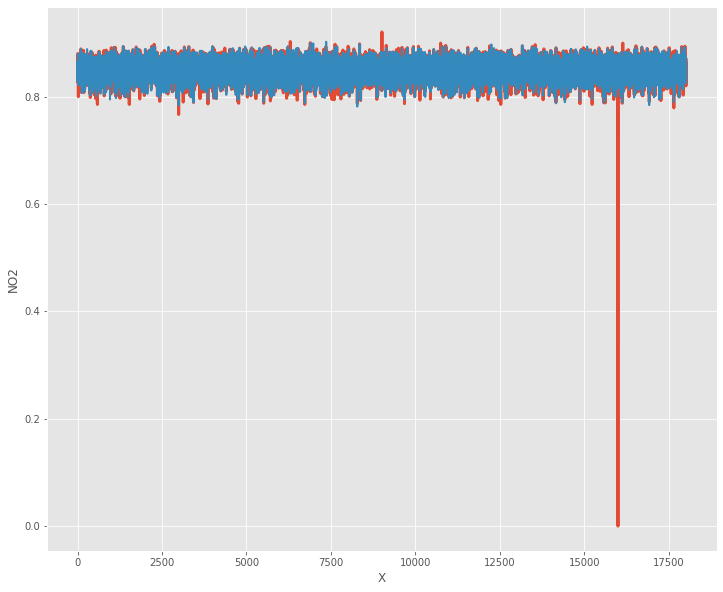

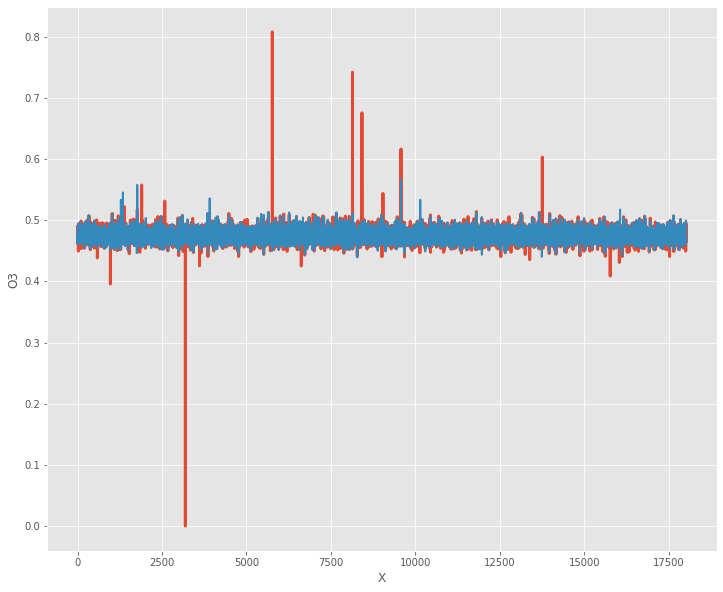

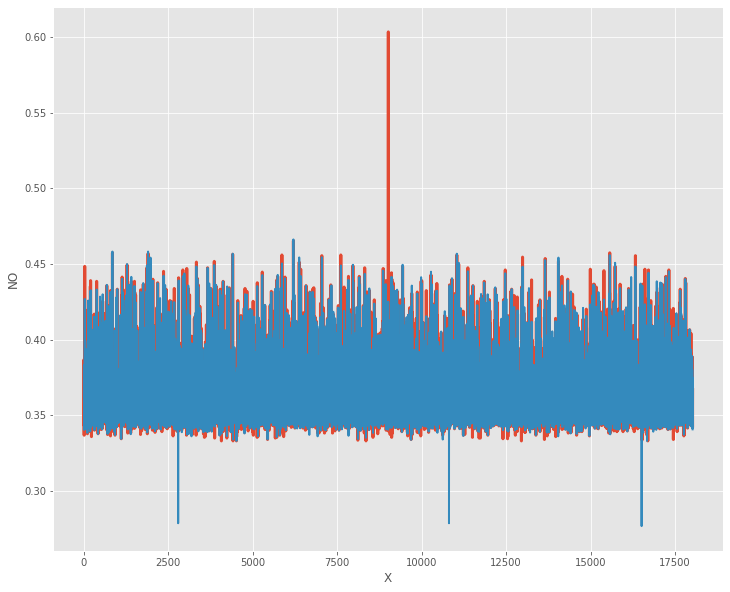

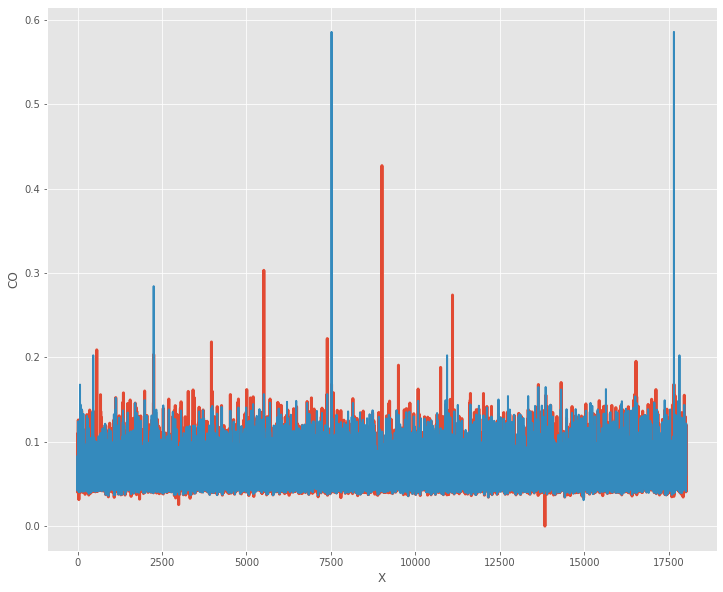

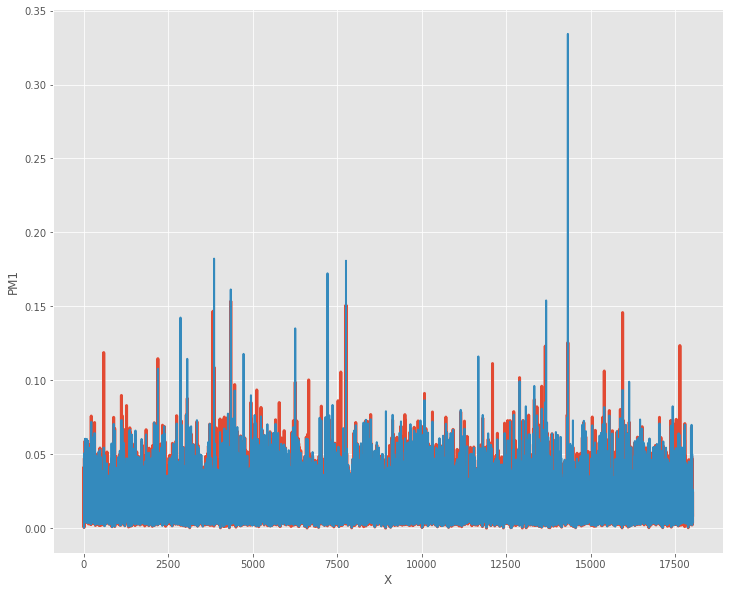

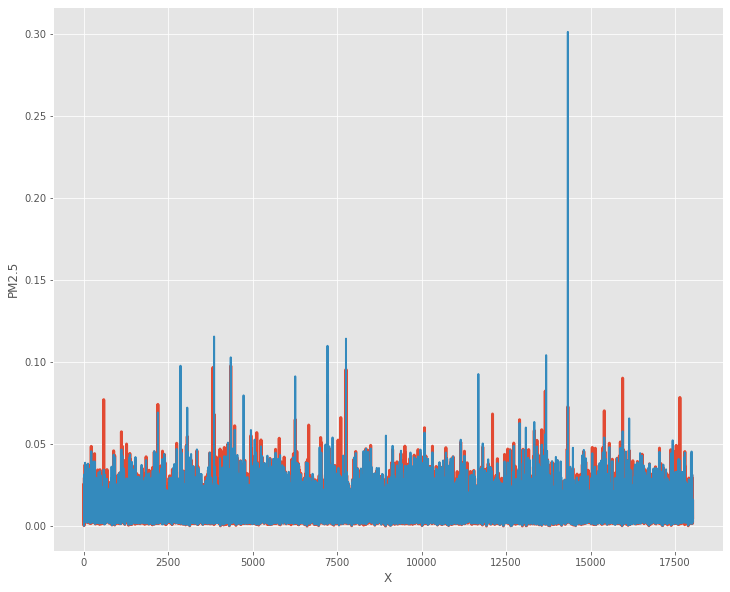

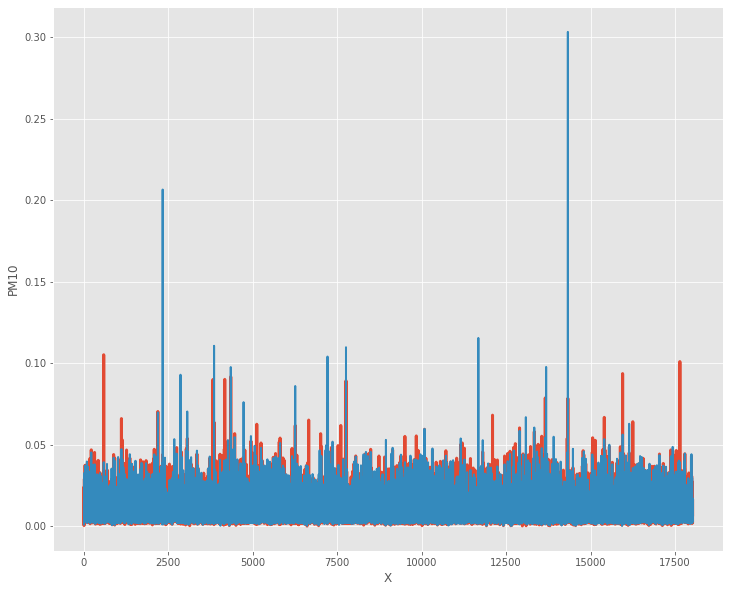

In [25]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred6)

from matplotlib import style
style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred6[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

##**7.Support Vector Machine Algorithm** 

In [26]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

model7 = MultiOutputRegressor(SVR(kernel='linear',C=1e1, gamma='auto'))

model_fit7=model7.fit(x_train,y_train)

print("Model Training Done !!")

# Dumping Model into a file

filename7 = 'svm.sav'
pickle.dump(model_fit7, open(filename7, 'wb'))

Model Training Done !!


In [17]:
loaded_model_fit7 = pickle.load(open(filename7, 'rb'))
loaded_model_fit7.predict(x_test)

array([[0.87919273, 0.51222225, 0.31485088, ..., 0.1015013 , 0.10087384,
        0.1012638 ],
       [0.8683715 , 0.48743611, 0.41777567, ..., 0.10064069, 0.10061477,
        0.10054028],
       [0.88765802, 0.51602674, 0.30920469, ..., 0.1043104 , 0.10327024,
        0.1033798 ],
       ...,
       [0.87548024, 0.51335187, 0.30805393, ..., 0.09926235, 0.09886236,
        0.09962797],
       [0.88992904, 0.50228916, 0.40063106, ..., 0.10433539, 0.10312415,
        0.10307702],
       [0.89234949, 0.51097675, 0.41877309, ..., 0.09817023, 0.09614323,
        0.09747182]])

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

y_test_pred7=model_fit7.predict(x_test)
y_train_pred7=model_fit7.predict(x_train)

#finding out the r2 score
r2_test7=r2_score(y_test,y_test_pred7)
r2_train7=r2_score(y_train,y_train_pred7)

print('r2 score on train data '+ str(r2_train7))
print('r2 score on test data '+ str(r2_test7))

svm_mae=metrics.mean_absolute_error(y_test, y_test_pred7)
svm_mse=metrics.mean_squared_error(y_test, y_test_pred7)
svm_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred7))
print('Mean Absolute Error:',svm_mae)
print('Mean Squared Error:',svm_mse )
print('Root Mean Squared Error:',svm_rmse)

r2 score on train data -36.36515905532197
r2 score on test data -47.4020930609896
Mean Absolute Error: 0.06570361499714113
Mean Squared Error: 0.0050151326902311095
Root Mean Squared Error: 0.07081760155661239


Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.87919273 0.51222225 0.31485088 ... 0.1015013  0.10087384 0.1012638 ]
 [0.8683715  0.48743611 0.41777567 ... 0.10064069 0.10061477 0.10054028]
 [0.88765802 0.51602674 0.30920469 ... 0.1043104  0.10327024 0.1033798 ]
 ...
 [0.87548024 0.51335187 0.30805393 ... 0.09926235 0.09886236 0.09962797]
 [0.88992904 0.50228916 0.40063106 ... 0.10433539 0.10312415 0.10307702]
 [0.89234949 0.51097675 0.41877309 ... 0.09817023 0.09614323 0.09747182]]


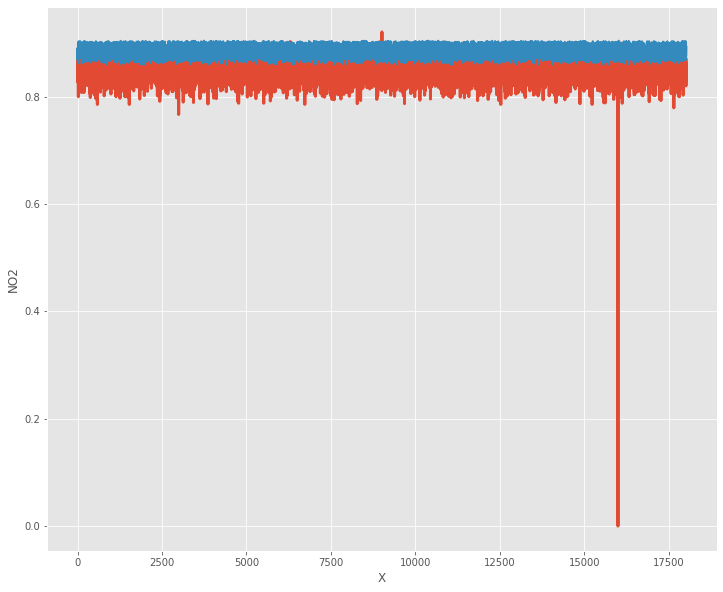

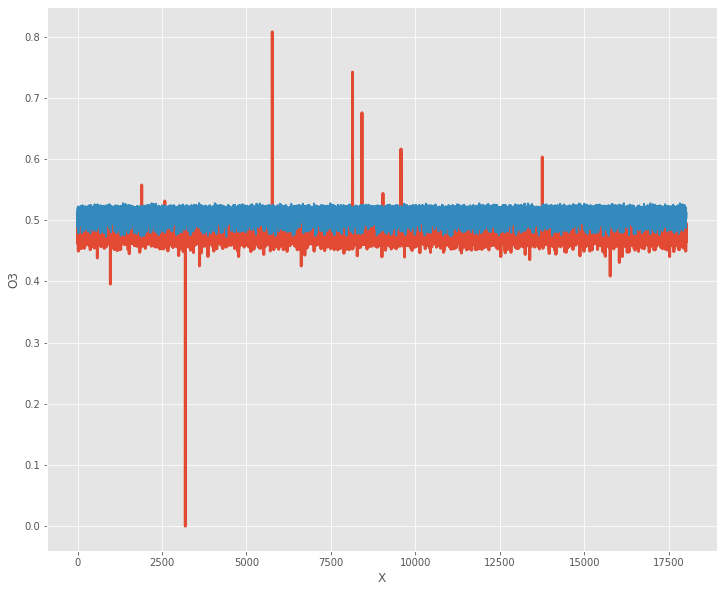

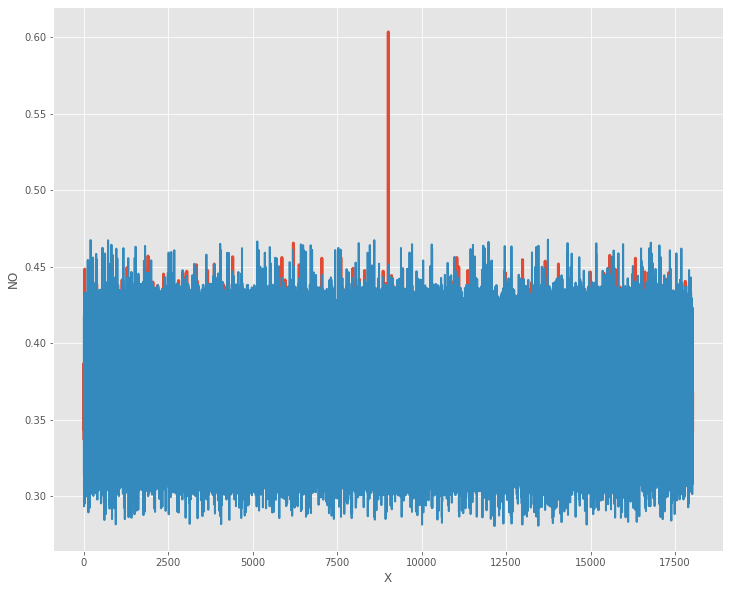

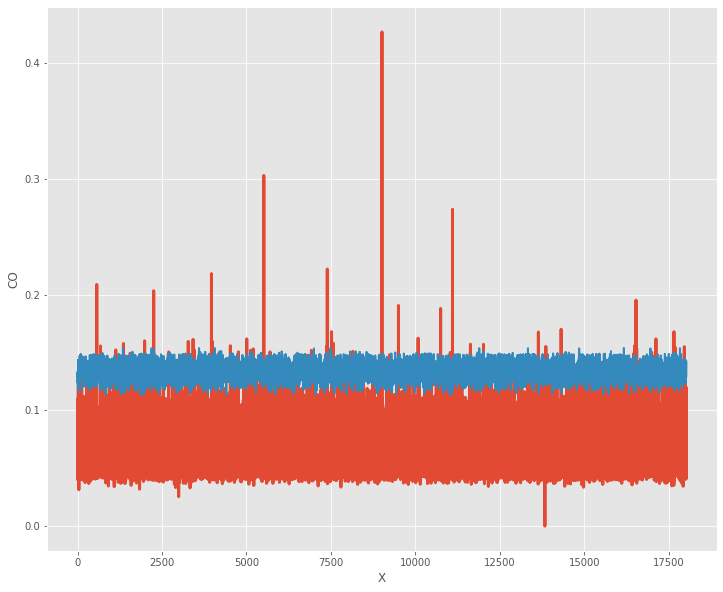

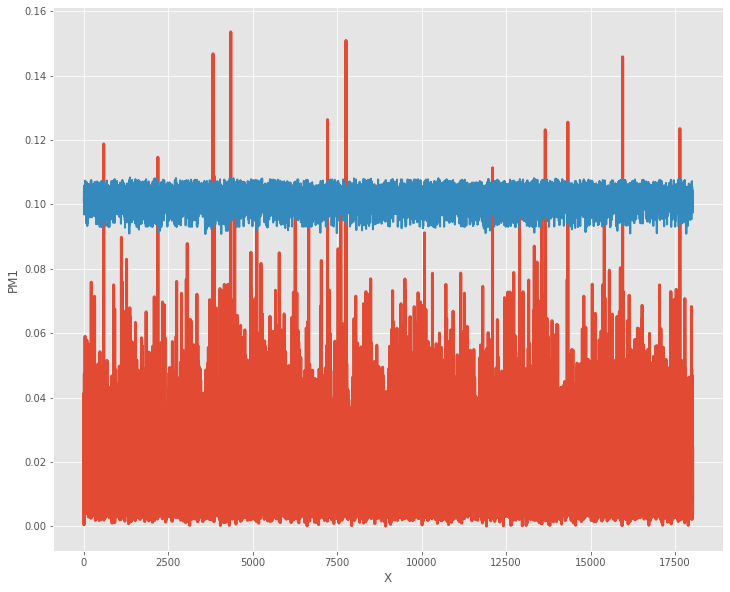

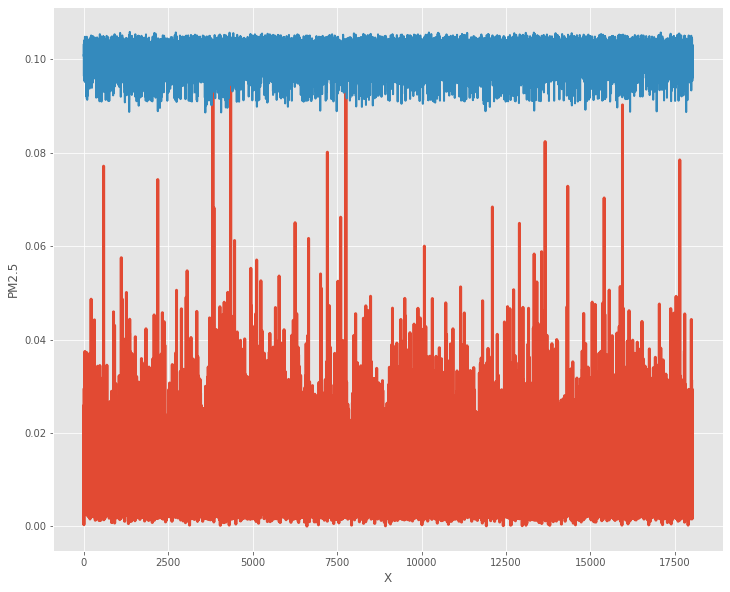

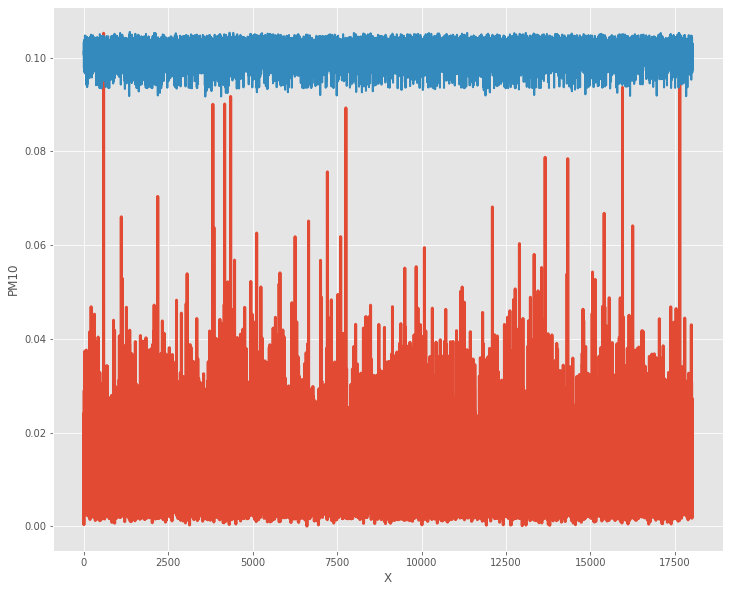

In [28]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred7)

from matplotlib import style
style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred7[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

##**8.LSTM Model**

## **Results Analysis for Various Models**

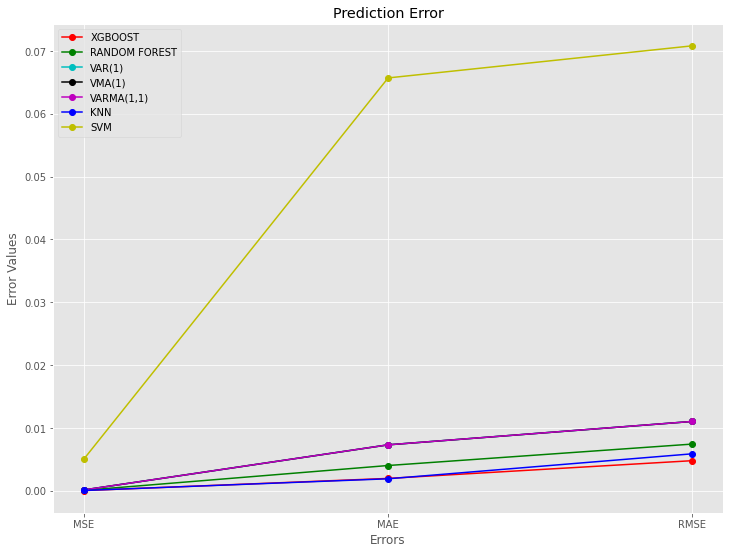

In [29]:
train_sizes=['MSE','MAE','RMSE','AIC','BIC']
xgboost_list=[0.00002285973898022485,0.001955862053424563,0.00478118593867932]
randomforest_list=[0.00005511369987097619,0.0040103400631165955,0.007423860173183233]
var_list=[0.00012164231497931546,0.007302538086412745,0.011029157491817562,-3623002.3803782254,-3621909.3004321116]
vma_list=[0.00012161140493576916,0.007300713574989763,0.011027756115174526,-3623029.066632705,-3621935.986686591]
varmax_list=[0.00012164231712440681,0.007302540667162326,0.011029157589063945,-3622904.383916931,-3621361.2122283005]
knn_list=[3.4516083577244375e-05,0.0018970229413473956,0.005875039027720954]
svm_list=[0.0050151326902311095,0.06570361499714113,0.07081760155661239]

plt.figure(figsize=[12,9])

plt.plot(train_sizes[:-2],xgboost_list, 'o-', color="r", label="XGBOOST")
plt.plot(train_sizes[:-2],randomforest_list, 'o-', color="g", label="RANDOM FOREST")
plt.plot(train_sizes[:-2],var_list[:-2], 'o-', color="c", label="VAR(1)")
plt.plot(train_sizes[:-2],vma_list[:-2], 'o-', color="k", label="VMA(1)")
plt.plot(train_sizes[:-2],varmax_list[:-2], 'o-',color="m",label="VARMA(1,1)")
plt.plot(train_sizes[:-2],knn_list, 'o-',color="b",label="KNN")
plt.plot(train_sizes[:-2],svm_list, 'o-',color="y",label="SVM")

plt.xlabel("Errors")
plt.ylabel("Error Values")
plt.title('Prediction Error')
plt.legend(loc='best')
plt.show()

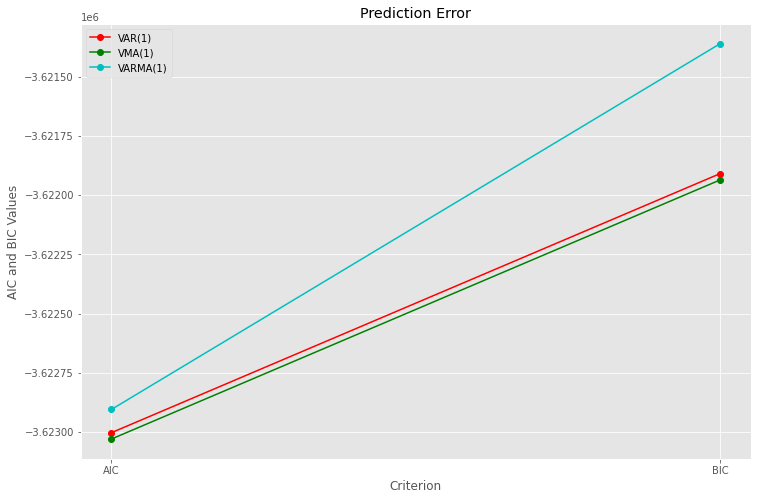

In [30]:
plt.figure(figsize=[12,8])

plt.plot(train_sizes[3:],var_list[3:], 'o-', color="r", label="VAR(1)")
plt.plot(train_sizes[3:],vma_list[3:], 'o-', color="g", label="VMA(1)")
plt.plot(train_sizes[3:],varmax_list[3:], 'o-', color="c", label="VARMA(1)")
plt.xlabel("Criterion")
plt.ylabel("AIC and BIC Values")
plt.title('Prediction Error')
plt.legend(loc='best')
plt.show()

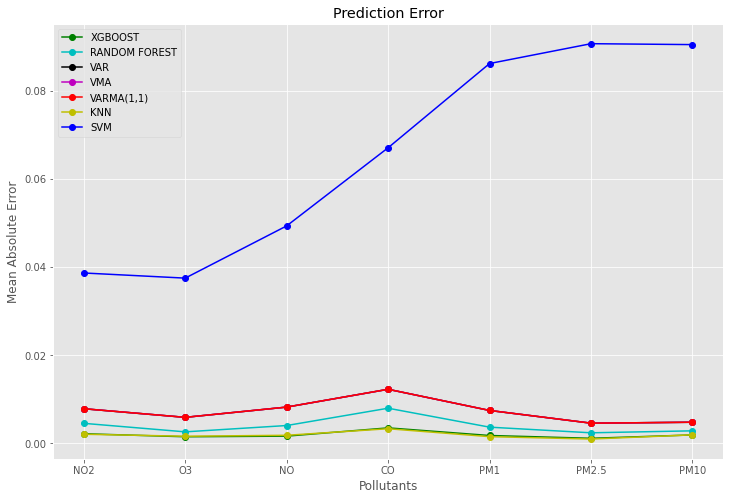

In [34]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1]))
  ma2.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1]))
  ma3.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1]))
  ma4.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1]))
  ma5.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1]))
  ma6.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred6[:,i:i+1]))
  ma7.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred7[:,i:i+1]))



plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")
plt.plot(train_sizes, ma6, 'o-', color="y", label="KNN")
plt.plot(train_sizes, ma7, 'o-', color="b", label="SVM")

plt.xlabel("Pollutants")
plt.ylabel("Mean Absolute Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()


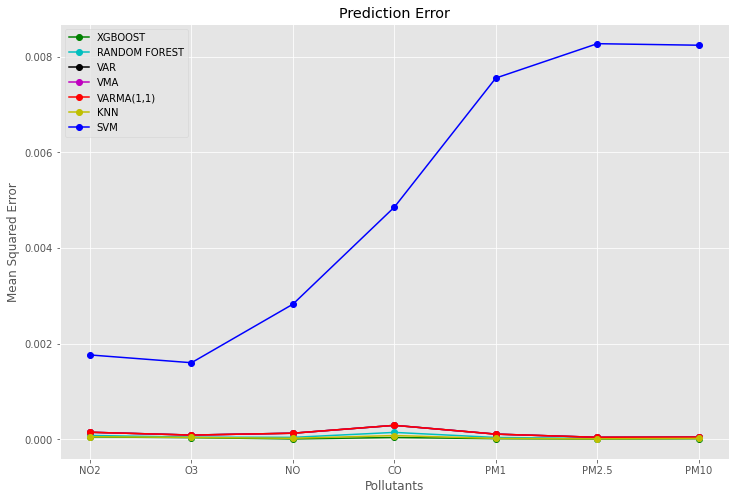

In [35]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1]))
  ma2.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1]))
  ma3.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1]))
  ma4.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1]))
  ma5.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1]))
  ma6.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred6[:,i:i+1]))
  ma7.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred7[:,i:i+1]))



plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")
plt.plot(train_sizes, ma6, 'o-', color="y", label="KNN")
plt.plot(train_sizes, ma7, 'o-', color="b", label="SVM")

plt.xlabel("Pollutants")
plt.ylabel("Mean Squared Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()


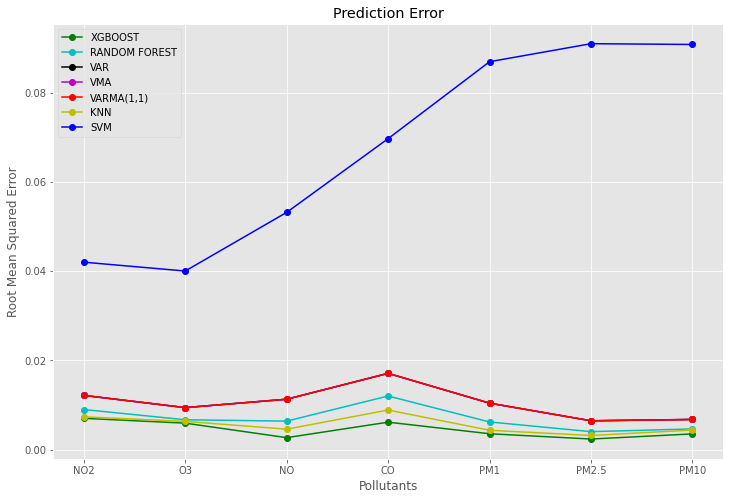

In [36]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1])))
  ma2.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1])))
  ma3.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1])))
  ma4.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1])))
  ma5.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1])))
  ma6.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred6[:,i:i+1])))
  ma7.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred7[:,i:i+1])))


plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")
plt.plot(train_sizes, ma6, 'o-', color="y", label="KNN")
plt.plot(train_sizes, ma7, 'o-', color="b", label="SVM")

plt.xlabel("Pollutants")
plt.ylabel("Root Mean Squared Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()
